In [434]:
import numpy as np

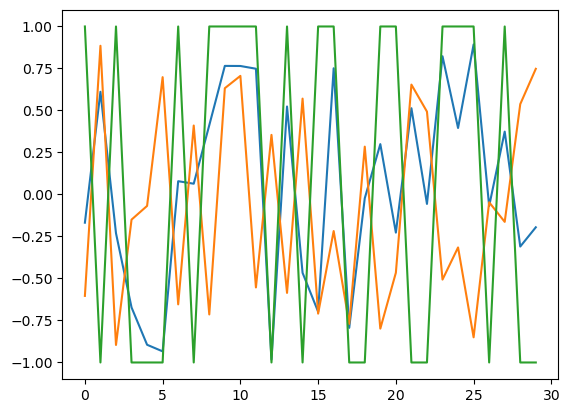

In [874]:
#Faremos dados aleatórios
import random
label = 0
coord = []
n = 30
nodes = [[random.uniform(1,-1), random.uniform(1,-1), label] for _ in range(n)]
for node in nodes:
    if(node[0] > node[1]):
        node[2] = 1
    else:
        node[2] = -1
plt.plot(nodes)

In [997]:
#Faremos a função de ativação degrau binário
from abc import ABC, abstractmethod
class activationFunction:
  @abstractmethod
  def activation(self, x):
    pass
  @abstractmethod
  def derivate(self, x):
    pass

class stepFunction(activationFunction):
    def __init__(self):
        pass
    def activation(self, x):
        if x >= 0:
            return 1
        else:
            return 0

class sigmoidFunction(activationFunction):
    def __init__(self):
        pass
    def activation(self, x):
        values = 1 / (1 + np.exp(-x))
        return values
    def derivate(self, x):
         return self.activation(x) * (1 - self.activation(x))

class perceptron:
    def __init__(self, weights_size):
        self.weights = np.random.normal(0,1, size= weights_size)
        self.bias = np.random.normal(0,1, 1)
        self.predictions = 0
        self.loss_weight_matrix = []
        self.weighted_sums_matrix = []
    
    # O Guess recebe os nós inputados e, para cada um deles, com seu peso escolhido (por enquanto)
    # aleatóriamente, nos dá um chute de se o nó correspodne a um +1 ou -1
    def guess(self, nodes, af):
        weighted_sums = np.dot([node[0:2] for node in nodes], self.weights) + self.bias
        self.predictions = af.activation(weighted_sums)
        return self.predictions
    
    def calc_loss(self, training_data, af):
        total_error = 0
        prediction_list = self.guess(training_data, af)
        for index, point in enumerate(training_data):
            target = point[2]
            prediction = prediction_list[index]
            error = (np.array(target) - prediction)**2
            total_error += error
        return total_error/ len(training_data)

    def update_weights(self, training_data, af):
        print(f"weights: {self.weights}, bias: {self.bias}")
        self.loss_weight_matrix = [self.weights[0], self.weights[1], self.bias[0], self.calc_loss(training_data, af)]
        print(self.loss_weight_matrix)

In [1002]:
p = perceptron(2)
p.update_weights(nodes, sigmoidFunction())

weights: [-2.53337067 -0.85164004], bias: [0.48469709]
[-2.5333706706182997, -0.8516400383869402, 0.4846970858514233, 1.5052538137969087]


In [996]:
27.9 / 30

0.9299999999999999

1.3430825237288508

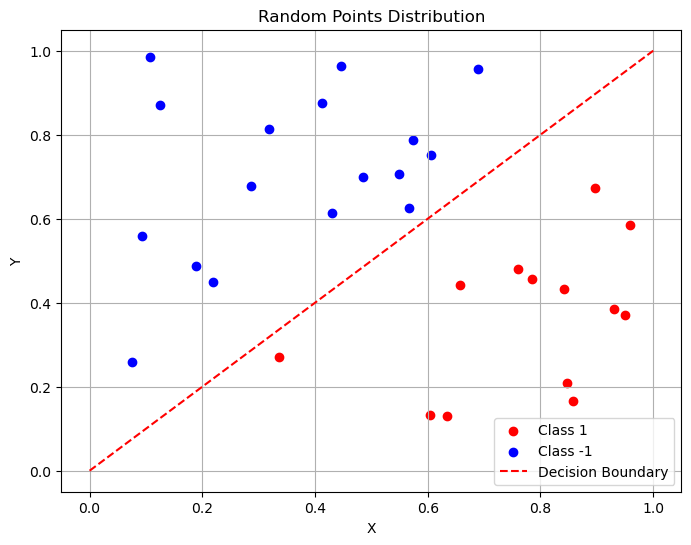

In [325]:
import matplotlib.pyplot as plt
import numpy as np

# Convert nodes to numpy array for easier manipulation
nodes_array = np.array(nodes)

# Split points based on label (nodes_array[:, 2] gets all labels)
red_points = nodes_array[nodes_array[:, 2] == 1]
blue_points = nodes_array[nodes_array[:, 2] == -1]

# Create plot
plt.figure(figsize=(8, 6))
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=1, label='Class 1')
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=1, label='Class -1')

# Add 45-degree line
plt.plot([0, 1], [0, 1], 'r--', label='Decision Boundary')

# Customize plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points Distribution')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
nodes_array = np.array(nodes)
#O número que inicializa o perceptron fala sobre a função que essa vai ter (ex: perceptron(2) = função linear -> (y=w0*x+w1))
p = perceptron(2)

In [341]:
prediction = p.guess([7,3])
print(prediction)
print(p.weights)
print(p.calc_loss(nodes_array))

-1
[-0.59893783 -1.44778952]
1.7333333333333334


In [79]:
def func(x,b0,b1):
    return b0*x + b1

def loss(nodes, func, b0, b1):
    total_error = 0
    for node in nodes:
        actual = node[1]
        predicted = func(node[0], b0, b1)
        total_error = total_error + (actual - predicted)**2
    return total_error / len(nodes)

In [80]:
# Test the loss function with sample data
test_nodes = [
    [0, 1, 1],  # x, y, label
    [1, 2, 1],
    [2, 3, -1]
]

# Test with different parameters
print("Test 1:", loss(test_nodes, func, b0=1, b1=0))  # Linear function y = x
print("Test 2:", loss(test_nodes, func, b0=2, b1=0))  # Linear function y = 2x
print("Test 3:", loss(test_nodes, func, b0=1, b1=1))  # Linear function y = x + 1

Test 1: 1.0
Test 2: 0.6666666666666666
Test 3: 0.0
